<a href="https://colab.research.google.com/github/shreyasbkgit/dllab/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week-3:** Design Deep forward Neural Network for image classification
- Design and implement an Image classification model to classify a dataset of images using Deep
   Feed Forward NN.
- Use the MNIST datasets.
- Record the accuracy corresponding to the number of epochs 5, 50, 100.
- Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.


MNIST Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

CIFAR10 and CIFAR100 Datasets(University of Toronto): https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR10 Dataset (Kaggle): https://www.kaggle.com/c/cifar-10/

Fashion MNIST Dataset(Kaggle): https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n], cmap='gray')
        axs[i, j].set_title(f"Label: {y_train[n]}")
        axs[i, j].axis('off')
        n += 1
plt.tight_layout()
plt.show()

# Reshape and normalize input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep Feedforward Neural Network architecture
model = Sequential(name="DFF-Model")
model.add(Input(shape=(784,), name='Input-Layer'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=50,
                    verbose='auto',
                    validation_split=0.2,
                    shuffle=True)

# Predict class labels
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Summary
print("\nModel Summary:")
model.summary()

# Optionally: print shapes of weights and biases for each layer
# for layer in model.layers:
#     weights = layer.get_weights()
#     if weights:
#         print(f"Layer: {layer.name}")
#         print(f" -- Weights shape: {weights[0].shape}")
#         print(f" -- Biases shape: {weights[1].shape}")

# Evaluation on training data
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

# Evaluation on test data
print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


To-Do:
Use the MNIST datasets.

Use the CIFAR10 datasets.

*Record the accuracy corresponding to the number of epochs 5, 50, 100.

*Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.

*Use the Fashion MNIST Dataset

*Perform and Plot the Comparative Analysis.


Num GPUs Available: 1
Error setting up GPU: Physical devices cannot be modified after being initialized
Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


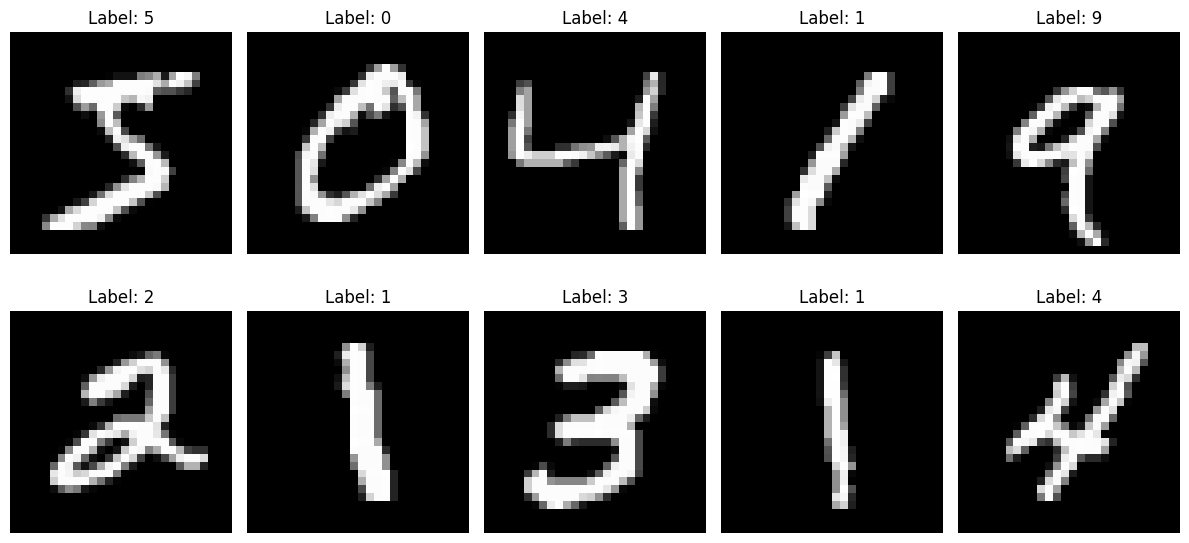

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8847 - loss: 0.3841 - val_accuracy: 0.9615 - val_loss: 0.1318
Epoch 2/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9638 - loss: 0.1153 - val_accuracy: 0.9626 - val_loss: 0.1261
Epoch 3/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9746 - loss: 0.0787 - val_accuracy: 0.9688 - val_loss: 0.1059
Epoch 4/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9800 - loss: 0.0652 - val_accuracy: 0.9696 - val_loss: 0.1056
Epoch 5/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9850 - loss: 0.0465 - val_accuracy: 0.9708 - val_loss: 0.1086
Epoch 6/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9697 - val_loss: 0.1191
Epoch 7/50
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9889 - loss: 0.0342 - val_accuracy: 0.9708 - val_loss: 0.1106
Epoch 8/50
4

Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       1.00      0.99      0.99      6131
           4       0.99      1.00      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      1.00      1.00      5918
           7       0.99      1.00      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.9

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# ==== GPU CHECK FOR COLAB ====
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth for GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU is available and memory growth is set.")
    except RuntimeError as e:
        print("Error setting up GPU:", e)
else:
    print("❌ No GPU found. Using CPU.")

# ==== Load digits data ====
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(X_train[n], cmap='gray')
        axs[i, j].set_title(f"Label: {y_train[n]}")
        axs[i, j].axis('off')
        n += 1
plt.tight_layout()
plt.show()

# Reshape and normalize input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# ==== Design the Deep Feedforward Neural Network architecture ====
model = Sequential(name="DFF-Model")
model.add(Input(shape=(784,), name='Input-Layer'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='he_normal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ==== Train the model ====
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=50,
                    verbose='auto',
                    validation_split=0.2,
                    shuffle=True)

# ==== Predictions ====
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# ==== Model Summary ====
print("\nModel Summary:")
model.summary()

# ==== Evaluation ====
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np

# GPU setup
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU is available and memory growth set.")
    except RuntimeError as e:
        print("❌ GPU setup error:", e)
else:
    print("❌ No GPU found. Using CPU.")

# Load and preprocess CIFAR-10
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train.reshape(-1, 32 * 32 * 3).astype("float32") / 255.0
X_test = X_test.reshape(-1, 32 * 32 * 3).astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the ANN model
def build_ann_model():
    model = Sequential(name="CIFAR10-ANN")
    model.add(Input(shape=(32 * 32 * 3,)))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                  metrics=['accuracy'])
    return model

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
model = build_ann_model()
history = model.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.1,
                    callbacks=[early_stop, reduce_lr],
                    verbose=2)

# Evaluate
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\n✅ Final Test Accuracy: {acc:.4f}")

# Predictions and classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


❌ GPU setup error: Physical devices cannot be modified after being initialized
Epoch 1/100
704/704 - 11s - 16ms/step - accuracy: 0.3140 - loss: 2.0620 - val_accuracy: 0.3568 - val_loss: 1.9103 - learning_rate: 1.0000e-03
Epoch 2/100
704/704 - 3s - 4ms/step - accuracy: 0.3861 - loss: 1.8524 - val_accuracy: 0.3920 - val_loss: 1.8385 - learning_rate: 1.0000e-03
Epoch 3/100
704/704 - 5s - 7ms/step - accuracy: 0.4059 - loss: 1.7982 - val_accuracy: 0.3914 - val_loss: 1.8378 - learning_rate: 1.0000e-03
Epoch 4/100
704/704 - 6s - 8ms/step - accuracy: 0.4182 - loss: 1.7765 - val_accuracy: 0.4088 - val_loss: 1.8028 - learning_rate: 1.0000e-03
Epoch 5/100
704/704 - 5s - 7ms/step - accuracy: 0.4133 - loss: 1.7821 - val_accuracy: 0.4232 - val_loss: 1.7574 - learning_rate: 1.0000e-03
Epoch 6/100
704/704 - 5s - 7ms/step - accuracy: 0.4200 - loss: 1.7610 - val_accuracy: 0.4252 - val_loss: 1.7855 - learning_rate: 1.0000e-03
Epoch 7/100
704/704 - 3s - 4ms/step - accuracy: 0.4309 - loss: 1.7444 - val_acc

KeyboardInterrupt: 